In [1]:
from __future__ import print_function
import functools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ROOT;
import sys
sys.path.append('/global/homes/w/wbhimji/cori-envs/nersc-rootpy/lib/python2.7/site-packages/')
import root_numpy as rnp
%matplotlib notebook

Welcome to ROOTaaS 6.06/06


# Loading the input into numpy

Using root_numpy to make structured arrays.

In [2]:
#filename = '/Users/sfarrell/Atlas/xaod/mc15_13TeV.361023.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ3W.merge.DAOD_EXOT3.e3668_s2576_s2132_r7728_r7676_p2613/DAOD_EXOT3.08204445._000002.pool.root.1'
#signal
#filename = '/global/projecta/projectdirs/atlas/atlaslocalgroupdisk/rucio/mc15_13TeV/76/71/DAOD_EXOT3.08629754._000001.pool.root.1'
#bg
#filename = '/global/projecta/projectdirs/atlas/atlaslocalgroupdisk/rucio/mc15_13TeV/ca/31/DAOD_EXOT3.08910637._000016.pool.root.1'
#Delphes
#filename = '/global/project/projectdirs/mpccc/wbhimji/Delphes-3.4.0/RPVSusy_1400_850_100_XXXX-10k-9-1-28.root'
filename = '/global/project/projectdirs/mpccc/wbhimji/Delphes-3.4.0/RPV10_1400_850-10k-1-1-1.root'
#Delphes Bg
#filename = '/global/project/projectdirs/mpccc/wbhimji/Delphes-3.3.2/Data/QCDBkg_200_2500-30k-2-22.root'
#bg_files = filename

In [3]:
#bg_files = [line.rstrip() for line in open('/global/project/projectdirs/das/wbhimji/RPVSusyJetLearn/atlas_dl/config/mc15_13TeV.361004.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ4.merge.DAOD_EXOT3.e3569_s2576_s2132_r7772_r7676_p2688-FileList.txt')]
#bg_files = [line.rstrip() for line in open('/project/projectdirs/das/wbhimji/RPVSusyJetLearn//atlas_dl/config/Delphes_QCDBkg_200_2500.txt')]
bg_files = [line.rstrip() for line in open('/project/projectdirs/dasrepo/atlas_rpv_susy/DelphesData/Delphes_QCDBkg_800_2500.txt')]
#sig_files = [line.rstrip() for line in open('/global/project/projectdirs/das/wbhimji/RPVSusyJetLearn/atlas_dl/config/mc15_13TeV.403568.MadGraphPythia8EvtGen_A14NNPDF23LO_GG_RPV10_1400_850.merge.DAOD_EXOT3.e5079_a766_a821_r7676_p2669-FileList.txt')]

In [3]:
# Branch names to read in and rename for convenience
#branchMap = {
#    'CaloCalTopoClustersAuxDyn.calEta' : 'ClusEta',
#    'CaloCalTopoClustersAuxDyn.calPhi' : 'ClusPhi',
#    'CaloCalTopoClustersAuxDyn.calE' : 'ClusE',
#    'AntiKt10LCTopoTrimmedPtFrac5SmallR20JetsAux.pt' : 'FatJetPt',
#    'AntiKt10LCTopoTrimmedPtFrac5SmallR20JetsAux.eta' : 'FatJetEta',
#    'AntiKt10LCTopoTrimmedPtFrac5SmallR20JetsAux.phi' : 'FatJetPhi',
#    'AntiKt10LCTopoTrimmedPtFrac5SmallR20JetsAux.m' : 'FatJetM',
#}

branchMap = {
    'Tower.Eta' : 'ClusEta',
    'Tower.Phi' : 'ClusPhi',
    'Tower.E' : 'ClusE',
    'FatJet.PT' : 'FatJetPt',
    'FatJet.Eta' : 'FatJetEta',
    'FatJet.Phi' : 'FatJetPhi',
    'FatJet.Mass' : 'FatJetM',
}

treename = 'Delphes'

In [4]:
entries = rnp.root2array(filename, treename=treename,
                         branches=branchMap.keys(),warn_missing_tree=True,
                          start=0, stop=1000000)
entries.dtype.names = branchMap.values()
print('Entries:', entries.size)
entries.dtype

TClass::Init:0: RuntimeWarning: no dictionary for class HepMCEvent is available
TClass::Init:0: RuntimeWarning: no dictionary for class Event is available
TClass::Init:0: RuntimeWarning: no dictionary for class GenParticle is available
TClass::Init:0: RuntimeWarning: no dictionary for class SortableObject is available
TClass::Init:0: RuntimeWarning: no dictionary for class Tower is available
TClass::Init:0: RuntimeWarning: no dictionary for class Jet is available
TClass::Init:0: RuntimeWarning: no dictionary for class MissingET is available
TClass::Init:0: RuntimeWarning: no dictionary for class Electron is available
TClass::Init:0: RuntimeWarning: no dictionary for class Photon is available
TClass::Init:0: RuntimeWarning: no dictionary for class Muon is available
TClass::Init:0: RuntimeWarning: no dictionary for class ScalarHT is available
TClass::Init:0: RuntimeWarning: no dictionary for class Rho is available
TClass::Init:0: RuntimeWarning: no dictionary for class Vertex is availabl

Entries: 10000


dtype([('FatJetPhi', 'O'), ('ClusEta', 'O'), ('FatJetEta', 'O'), ('FatJetM', 'O'), ('FatJetPt', 'O'), ('ClusPhi', 'O'), ('ClusE', 'O')])

# Indexing and selection with numpy
Since the data is structured, we can index by key name and do some fancy stuff.

In [5]:
# Multiple ways to dump variables for a specific event.
# I'm actually surprised these both work.
print(entries[0]['FatJetPt'])
print(entries['FatJetPt'][0]*1000)
print(entries['FatJetM'][0])


[ 550.12115479  459.74655151  351.13119507  298.21060181  166.30787659
  161.58760071  102.10914612  100.22109985   78.06517792   59.38471985
   50.05165863   35.4783287    25.56940269   20.10978889]
[ 550121.15478516  459746.55151367  351131.19506836  298210.60180664
  166307.87658691  161587.60070801  102109.14611816  100221.09985352
   78065.17791748   59384.71984863   50051.65863037   35478.32870483
   25569.4026947    20109.78889465]
[ 138.5450592   246.06826782  121.46086121   68.67362976   63.20275879
   55.82482529   32.745121     52.35852432   29.9309082    16.74505234
   20.99988365   23.5653038    14.96719837   13.23032665]


In [6]:
entries['FatJetPt']=entries['FatJetPt']*1000
entries['FatJetM']=entries['FatJetM']*1000

In [7]:
bgdf = pd.DataFrame.from_records(entries)

In [8]:
# Perform object selections on one event
event = entries[3]
event['FatJetPt'] > 300000

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [9]:
# Select fatjets with pt > 200 GeV for all events in one go
f = np.vectorize(lambda jetPts: jetPts > 200000, otypes=[np.ndarray])
selectedJets = f(entries['FatJetPt'])
print(selectedJets)

[ array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False], dtype=bool)
 array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False], dtype=bool)
 array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False], dtype=bool)
 ...,
 array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)
 array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False], dtype=bool)
 array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)]


In [10]:
# Select events with at least 2 selected jets
countSelected = np.vectorize(sum)
numJets = countSelected(selectedJets)
selectedEvents = numJets >= 2
print(numJets)
print(selectedEvents)

[4 4 5 ..., 3 4 4]
[ True  True  True ...,  True  True  True]


## Physics selections and variables
Enough playing around. Let's test out the actual physics selections. The code has been put into the physics_selections module in the containing directory of this notebook.

In [11]:
sys.path.append('/project/projectdirs/das/wbhimji/RPVSusyJetLearn/atlas_dl_submitter/atlas_dl/scripts/')
from physics_selections import (select_fatjets, is_baseline_event,
                                sum_fatjet_mass, is_signal_region_event)

In [12]:
vec_select_fatjets = np.vectorize(select_fatjets, otypes=[np.ndarray])
vec_select_baseline_events = np.vectorize(is_baseline_event)
selectedFatJets = vec_select_fatjets(entries['FatJetPt'], entries['FatJetEta'])
baselineEvents = vec_select_baseline_events(entries['FatJetPt'], selectedFatJets)
print('Baseline selected events: %d / %d' % (np.sum(baselineEvents), entries.size))

Baseline selected events: 9636 / 10000


In [13]:
# Calculate the summed jet mass for all events
summedMasses = np.vectorize(sum_fatjet_mass)(entries['FatJetM'], selectedFatJets)
print(summedMasses[baselineEvents])

[ 574747.81799316  798706.8862915   664115.17333984 ...,  935794.41070557
  706439.91851807  671791.95404053]


In [14]:
vec_select_sr_events = np.vectorize(is_signal_region_event)
signalEvents = vec_select_sr_events(summedMasses, entries['FatJetPt'], entries['FatJetEta'],
                                    selectedFatJets, baselineEvents)
signalEntries = entries[signalEvents]
numSignalEvents = np.sum(signalEvents)
print('Signal events: %d / %d' % (numSignalEvents, entries.size))

Signal events: 5658 / 10000


# Drawing signal region events

In [15]:
def get_hist2d(event):
    """Convert event into the calo-cluster image"""
    return np.histogram2d(event['ClusEta'], event['ClusPhi'],
                          bins=(50, 50), weights=event['ClusE'],
                          range=[[-2.5, 2.5], [-3.15, 3.15]])[0]

def plot_calo_image(h2d):
    """Plot a calo-image on the current axes"""
    plt.imshow(np.log10(h2d).T, #extent=[-2.,2.,-3.14, 3.14],
               extent=[-2.5, 2.5, -3.15, 3.15],
               interpolation='none', aspect='auto', origin='low')
    plt.colorbar(label='Cluster energy [Log(MeV)]')
    plt.xlabel('eta')
    plt.ylabel('phi')

def plot_jets(jetEtas, jetPhis, jetRadius=1):
    """Plot jet circles on the current axes"""
    for eta, phi in zip(jetEtas, jetPhis):
        circle = plt.Circle((eta, phi), radius=jetRadius, facecolor='none')
        plt.gcf().gca().add_artist(circle)

In [16]:
# Pick out a sample of signal region events.
# The indexing is now starting to get very confusing.
numSample = 4
sampleIdxs = np.random.choice(np.arange(numSignalEvents), numSample, replace=False)
sampleEntries = signalEntries[sampleIdxs]
sampleFatJets = selectedFatJets[signalEvents][sampleIdxs] # are we lost yet?
assert(sampleEntries.size == sampleFatJets.size)

In [17]:
# Get the quantities to plot
hists = [get_hist2d(ev) for ev in sampleEntries]
jetEtas = [etas[jets] for (etas, jets) in zip(sampleEntries['FatJetEta'], sampleFatJets)]
jetPhis = [phis[jets] for (phis, jets) in zip(sampleEntries['FatJetPhi'], sampleFatJets)]

<IPython.core.display.Javascript object>


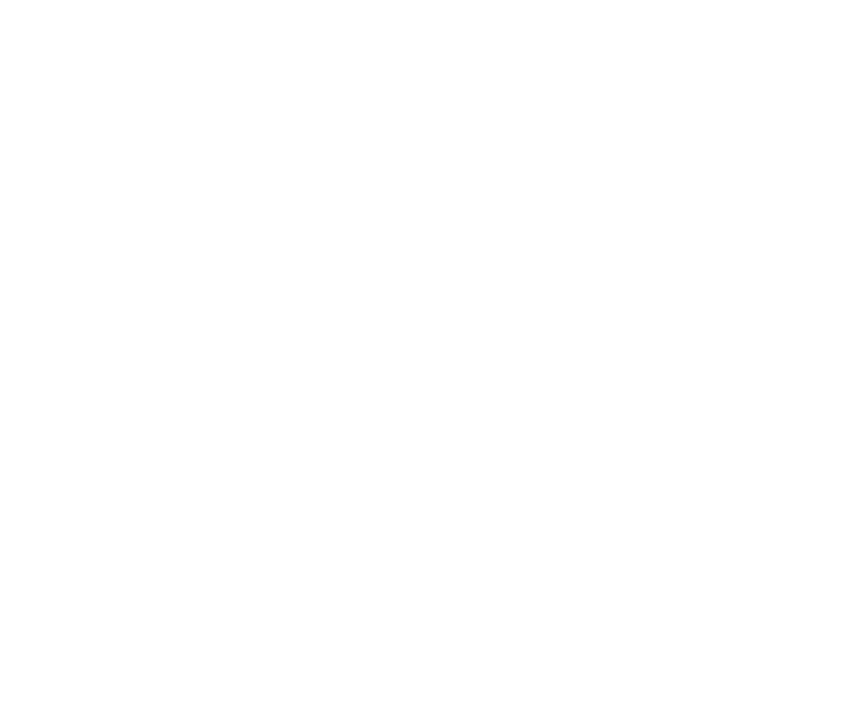

/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10


In [18]:
# Draw the calo images and draw the selected fat jets as circles
plt.figure(figsize=(12, 10))
plt.subplot(221)
plot_calo_image(hists[0])
plot_jets(jetEtas[0], jetPhis[0])

plt.subplot(222)
plot_calo_image(hists[1])
plot_jets(jetEtas[1], jetPhis[1])

plt.subplot(223)
plot_calo_image(hists[2])
plot_jets(jetEtas[2], jetPhis[2])

plt.subplot(224)
plot_calo_image(hists[3])
plot_jets(jetEtas[3], jetPhis[3])

In [19]:
num_jets = np.vectorize(lambda x: np.sum(x))

from physics_selections import fatjet_deta12

def fatJetDelta(entriesEta,selectedFatJets):
    if sum(selectedFatJets) < 4:
        return -99
    else:
        return fatjet_deta12(entriesEta,selectedFatJets)

fatjetDelta = np.vectorize(fatJetDelta)(entries['FatJetEta'],selectedFatJets)

maxpts = np.vectorize(lambda x: np.max(x))

In [20]:
def fatJetSumMass(entriesMass,selectedFatJets):
    if sum(selectedFatJets) < 4:
        return -99
    else:
        return  sum_fatjet_mass(entriesMass,selectedFatJets)
vec_fatJetSumMass = np.vectorize(fatJetSumMass)(entries['FatJetM'],selectedFatJets)


(array([   4.,   23.,   78.,  186.,  277.,  473.,  620.,  774.,  876.,
         900.,  882.,  800.,  680.,  587.,  520.,  411.,  351.,  324.,
         231.,  199.,  174.,  120.,  106.,   80.,   62.,   57.,   44.,
          20.,   30.,   22.,   25.,   11.,   13.,   10.,    2.,    5.,
           8.,    3.,    4.,    1.,    1.,    2.,    1.,    0.,    0.,
           0.,    1.,    0.,    1.,    1.]),
 array([  274406.37207031,   321617.95654297,   368829.54101562,
          416041.12548828,   463252.70996094,   510464.29443359,
          557675.87890625,   604887.46337891,   652099.04785156,
          699310.63232422,   746522.21679688,   793733.80126953,
          840945.38574219,   888156.97021484,   935368.5546875 ,
          982580.13916016,  1029791.72363281,  1077003.30810547,
         1124214.89257812,  1171426.47705078,  1218638.06152344,
         1265849.64599609,  1313061.23046875,  1360272.81494141,
         1407484.39941406,  1454695.98388672,  1501907.56835938,
         154911

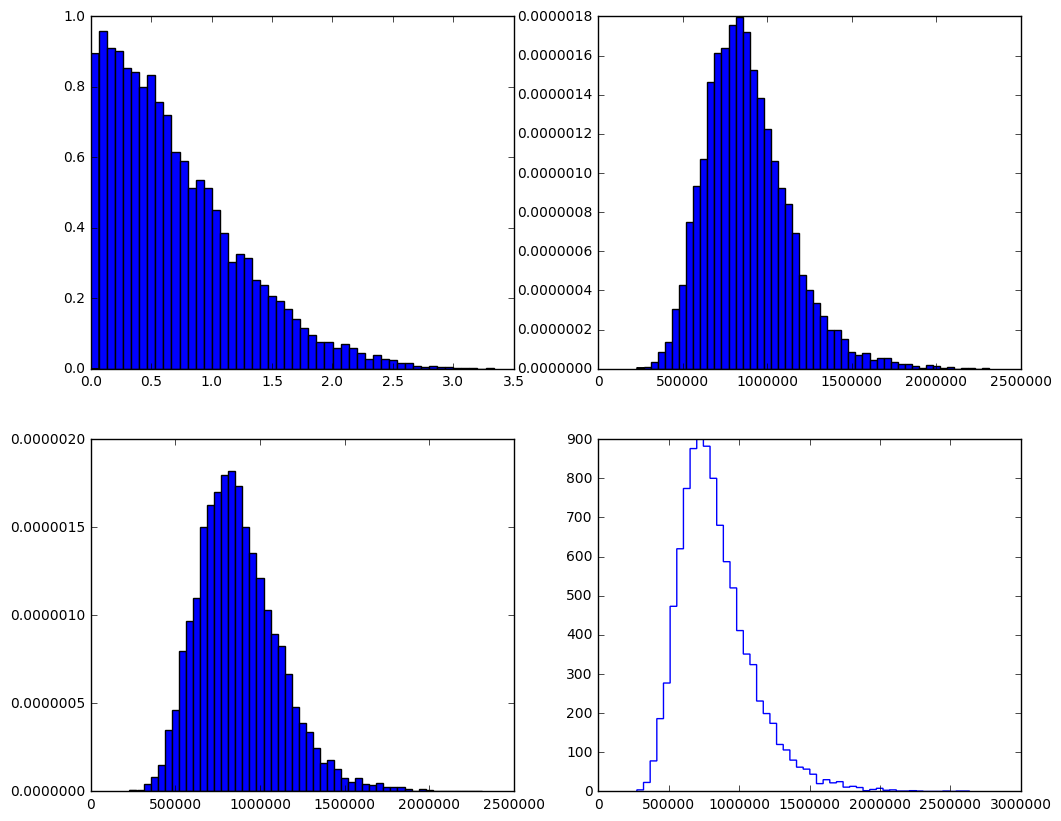

In [21]:
%matplotlib inline
plt.figure(figsize=(12, 10))
plt.subplot(221)
#np.histogram(jetEtas)
plt.hist(fatjetDelta[fatjetDelta>0],bins=50, normed=True)

plt.subplot(222)
plt.hist(summedMasses[baselineEvents],bins=50, normed=True)

plt.subplot(223)
plt.hist(vec_fatJetSumMass[vec_fatJetSumMass>0],bins=50, normed=True)
#plt.hist(num_jets(selectedFatJets))

plt.subplot(224)
plt.hist(maxpts(entries['FatJetPt']),bins=50, histtype='step')

In [22]:
#hist_handle = plt.figure()
#import pickle as pl
#pl.dump(hist_handle,file('Delphes-Hists.pickle','w'))

In [23]:
sys.path.append('/global/homes/w/wbhimji/cori-envs/nersc-rootpy/lib/python2.7/site-packages/')
from rootpy.plotting import Hist
from root_numpy import fill_hist
from rootpy.io import root_open, DoesNotExist
f = root_open('DelphesHistos-PileUp-Mu20_subtracted-TopDecay-HighGran.root','RECREATE')

In [24]:
hDeltaEta = Hist(100, 0, 3.2, name='DeltaEta')
fill_hist(hDeltaEta,fatjetDelta[fatjetDelta>0])
hSumJetMass = Hist(100, 0, 2000, name='SumJetMass')
fill_hist(hSumJetMass,summedMasses[baselineEvents]/1000)
hSumJetMassSelected = Hist(100, 0, 2000, name='SumJetMassSelected')
fill_hist(hSumJetMassSelected,vec_fatJetSumMass[vec_fatJetSumMass>0]/1000)
hMaxJetPt = Hist(100, 0, 2000, name='MaxJetPt')
fill_hist(hMaxJetPt,maxpts(entries['FatJetPt'])/1000)
hNumJets = Hist(100, 0, 8, name='NumJets')
fill_hist(hNumJets,num_jets(selectedFatJets))

In [25]:
hDeltaEta.Write()
hSumJetMass.Write()
hMaxJetPt.Write()
hNumJets.Write()
hSumJetMassSelected.Write()
f.Close()

False

/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10


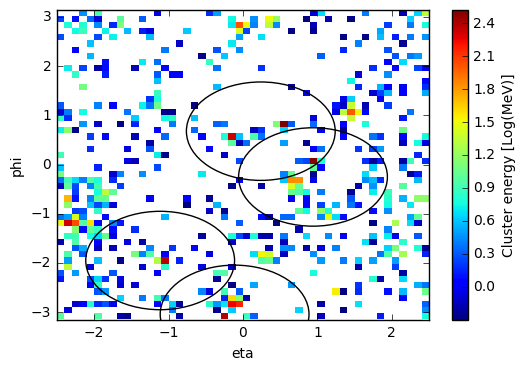

In [26]:
plot_calo_image(hists[3])
plot_jets(jetEtas[3], jetPhis[3])